LIBRARIES

In [7]:
import numpy as np
from sklearn.decomposition import FastICA
import librosa
import matplotlib.pyplot as plt
import pandas as pd

1025 components for 8864 time samples, there is no point to show every component, so im showing only 9 of them
#using components none, make it automatic, based on audio


c:\Users\AirU\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


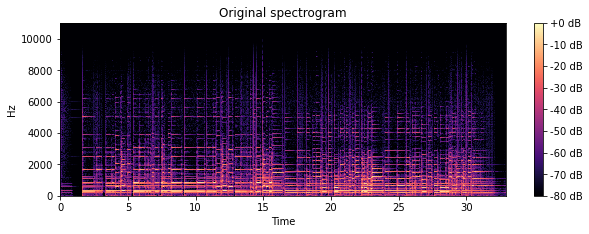

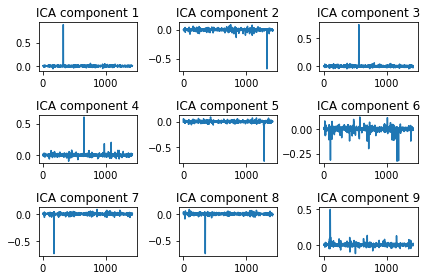

In [8]:
y, sr = librosa.load('melody.wav')

S_TFT = np.abs(librosa.stft(y))

eps = 1e-7 
Amp_db = librosa.amplitude_to_db(S_TFT + eps, ref=np.max)

ica = FastICA(n_components=None)
ica_trans = ica.fit_transform(Amp_db.T)

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
librosa.display.specshow(Amp_db, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Original spectrogram')
plt.show()

ica_trans = ica_trans.T

for i, s in enumerate(ica_trans):
    if i >= 9: 
        break
    plt.subplot(3, 3, i + 1)
    plt.plot(s)
    plt.title('ICA component {}'.format(i+1))

plt.tight_layout()
plt.show()



In [9]:
segment_length = 20
num_samples_segment = sr * segment_length

num_segments = int(np.floor(len(y) / num_samples_segment))

df = pd.DataFrame(columns=['Segment', 'ICA Component', 'Dominant frequency'])

for segment in range(num_segments):

    start = segment * num_samples_segment
    end = (segment + 1) * num_samples_segment
    segment = y[start:end]
    
    S_TFT = np.abs(librosa.stft(segment))

    Amp_db = librosa.amplitude_to_db(S_TFT, ref=np.max)

    ica = FastICA(n_components=None)
    ica_trans = ica.fit_transform(Amp_db.T)
    ica_trans = ica_trans.T  

    for i, s in enumerate(ica_trans):
        if i >= 9:
            break

        fft = np.fft.fft(s)
        
        freqs = np.fft.fftfreq(len(s), 1/sr)
        idx = np.argmax(np.abs(fft))
        freq = freqs[idx]

        df = df.append({
            'Segment': segment + 1,
            'ICA Component': i + 1,
            'Dominant frequency': freq
        }, ignore_index=True)

print(df)

                                             Segment ICA Component  \
0  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             1   
1  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             2   
2  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             3   
3  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             4   
4  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             5   
5  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             6   
6  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             7   
7  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             8   
8  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             9   

  Dominant frequency  
0        -127.900232  
1                0.0  
2                0.0  
3         895.301624  
4       -8492.575406  
5       -8032.134571  
6         895.301624  
7        6727.552204  
8                0.0  


C:\Users\AirU\AppData\Local\Temp\ipykernel_24044\762805479.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\AirU\AppData\Local\Temp\ipykernel_24044\762805479.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\AirU\AppData\Local\Temp\ipykernel_24044\762805479.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\AirU\AppData\Local\Temp\ipykernel_24044\762805479.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\AirU\AppData\Local\Temp\ipykernel_24044\762805479.py:71: FutureWarning: The frame.append method is deprecated and will 